<ipython-input-1-a0e3c735b7b3>:24: RuntimeWarning: divide by zero encountered in power
  return k * (t ** -alpha)


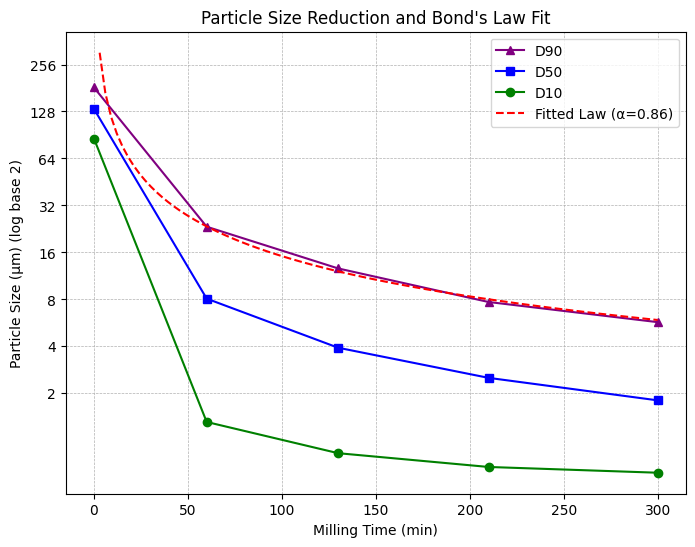

Fitted α for Bond's Law: 0.86


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the dataset (time and PSD results from milling)
data = {
    "Time (min)": [0, 60, 130, 210, 300],
    "D90 (µm)": [182.4, 23.38, 12.63, 7.70, 5.72],
    "D50 (µm)": [133.0, 8.09, 3.92, 2.514, 1.804],
    "D10 (µm)": [85.85, 1.311, 0.827, 0.675, 0.620],
}

df = pd.DataFrame(data)

# Extract values
milling_time = df["Time (min)"].values
D90 = df["D90 (µm)"].values
D50 = df["D50 (µm)"].values
D10 = df["D10 (µm)"].values

# Define Bond's/Kissinger’s Law function
def bonds_law(t, alpha, k):
    return k * (t ** -alpha)

# Fit Bond's Law to D90 data (excluding initial unmilled state)
popt, _ = curve_fit(bonds_law, milling_time[1:], D90[1:])
alpha_fitted, k_fitted = popt

# Generate fitted curve
t_fit = np.linspace(min(milling_time), max(milling_time), 100)
D90_fit = bonds_law(t_fit, alpha_fitted, k_fitted)

# Plot all data with log base 2 y-axis
plt.figure(figsize=(8, 6))
plt.plot(milling_time, D90, marker='^', linestyle='-', label="D90", color='purple')
plt.plot(milling_time, D50, marker='s', linestyle='-', label="D50", color='blue')
plt.plot(milling_time, D10, marker='o', linestyle='-', label="D10", color='green')
plt.plot(t_fit, D90_fit, linestyle='--', color='red', label=f"Fitted Law (α={alpha_fitted:.2f})")

# Logarithmic y-axis (base 2)
plt.yscale('log', base=2)
plt.yticks([2, 4, 8, 16, 32, 64, 128, 256], labels=["2", "4", "8", "16", "32", "64", "128", "256"])

# Labels and legend
plt.xlabel("Milling Time (min)")
plt.ylabel("Particle Size (µm) (log base 2)")
plt.title("Particle Size Reduction and Bond's Law Fit")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show plot
plt.show()

# Print fitted alpha value
print(f"Fitted α for Bond's Law: {alpha_fitted:.2f}")
